In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/프로젝트 폴더/data/selected_data

/content/drive/.shortcut-targets-by-id/1fmVXXO9WkxfQqimV76GhZhDAdNd3hhtJ/프로젝트 폴더/data/selected_data


In [4]:
%ls

 data_out.csv                    상권영역.csv
 merged.csv                      상권점포.csv
 model_r.pkl                     상권직장인구.csv
 강남구예상매출.csv              상권집객시설.csv
'매출예측 데이터 전처리.ipynb'   상권추정매출.csv
 상권상주인구.csv               '종합점수용 데이터 조인.ipynb'
 상권생활인구.csv                행정동코드.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [6]:
data = pd.read_csv('data_out.csv')            
data.drop(columns = ['Unnamed: 0'], inplace=True)
# 분기당 매출을 월매출로 생각하자!(1분기 : 3개월, 유사업종수로 나눔 까지 고려)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96282 entries, 0 to 96281
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   서비스업종코드명          96282 non-null  object 
 1   점포수               96282 non-null  float64
 2   유사업종점포수           96282 non-null  float64
 3   개업점포수             96282 non-null  float64
 4   폐업점포수             96282 non-null  float64
 5   집객시설수             96282 non-null  float64
 6   관공서수              96282 non-null  float64
 7   은행수               96282 non-null  float64
 8   버스정거장수            96282 non-null  float64
 9   지하철수              96282 non-null  float64
 10  약국수               96282 non-null  float64
 11  총직장인구수            96282 non-null  float64
 12  총상주인구수            96282 non-null  float64
 13  총_생활인구_수          96282 non-null  float64
 14  남성_생활인구_수         96282 non-null  float64
 15  여성_생활인구_수         96282 non-null  float64
 16  연령대_10_생활인구_수     96282 non-null  float6

In [8]:
data.describe()

,점포수,유사업종점포수,개업점포수,폐업점포수,집객시설수,관공서수,은행수,버스정거장수,지하철수,약국수,...,시간대_5_생활인구_수,시간대_6_생활인구_수,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,분기당매출금액
count,96282.000000,96282.000000,96282.000000,96282.000000,96282.000000,96282.000000,96282.000000,96282.000000,96282.000000,96282.000000,...,96282.000000,96282.000000,96282.000000,96282.000000,96282.000000,96282.000000,96282.000000,96282.000000,96282.000000,9.628200e+04
mean,6.302777,7.975561,0.298363,0.301105,40.245165,1.107289,0.660175,6.031865,0.412538,4.234322,...,159277.555488,110160.737775,130554.736270,131321.262152,131493.599967,131402.013390,131084.515195,125629.758940,122980.307872,8.597089e+06
std,4.876970,5.772604,0.457542,0.458741,55.315995,1.647173,0.706282,7.000345,0.757879,5.434352,...,91603.908977,65702.482854,75685.770328,76251.126720,76337.538536,76253.480737,75961.462348,72802.786371,72024.960313,5.084188e+06
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,1.000000e+06
25%,2.000000,3.000000,0.000000,0.000000,10.000000,0.000000,0.000000,2.000000,0.000000,1.000000,...,77636.000000,51626.000000,64136.000000,64427.000000,64467.000000,64486.000000,64300.000000,61021.000000,58642.000000,3.970000e+06
50%,5.000000,6.000000,0.000000,0.000000,21.000000,1.000000,1.000000,4.000000,0.000000,2.000000,...,153472.000000,104622.000000,123251.000000,123700.500000,123787.000000,123524.000000,123349.000000,119995.000000,117252.000000,7.720000e+06
75%,12.000000,15.000000,1.000000,1.000000,48.000000,2.000000,1.000000,8.000000,1.000000,6.000000,...,264633.000000,183237.000000,217996.000000,219762.000000,219695.000000,219594.000000,219000.000000,208081.000000,203824.500000,1.439000e+07
max,13.500000,16.500000,1.000000,1.000000,593.000000,21.000000,2.000000,83.000000,5.000000,52.000000,...,277593.375000,196690.500000,228691.500000,230372.625000,230721.000000,230492.250000,229510.500000,219952.875000,217156.500000,1.563000e+07


In [9]:
# # 단위 십만원으로
# data['분기당매출금액'] *= 100000

In [10]:
# 분류 모델
def label_encode_by_interval(df, column, intervals):
    """
    Perform label encoding by interval on a given column in a Pandas DataFrame.

    Parameters:
    - df: the DataFrame to perform label encoding on
    - column: the name of the column to encode
    - intervals: a list of tuples defining the intervals to use for encoding. Each tuple should contain
      two elements: the lower bound and upper bound of the interval (inclusive), in that order.

    Returns:
    - A copy of the original DataFrame with the specified column label-encoded using the given intervals.
    """
    # Make a copy of the input dataframe to avoid modifying it
    encoded_df = df.copy()

    # Define a dictionary to map intervals to labels
    interval_map = {}
    for i, interval in enumerate(intervals):
        interval_mask = (encoded_df[column] >= interval[0]) & (encoded_df[column] <= interval[1])
        encoded_df.loc[interval_mask, column] = i

    return encoded_df

# Define the intervals to use for encoding column '분기당매출금액'
intervals = [(1e6, 2.5e6), (2.5e6, 4e6), (4e6, 5.5e6), (5.5e6, 7.5e6), (7.5e6, 9.5e6), (9.5e6, 1.2e7), (1.2e7, 1.562e7), (1.562e7, 2e8)]



# Apply the label encoding function to column '분기당매출금액'
encoded_df = label_encode_by_interval(data, '분기당매출금액', intervals)

data = encoded_df


In [11]:
print(len(encoded_df[encoded_df['분기당매출금액']==0]))
print(len(encoded_df[encoded_df['분기당매출금액']==1]))
print(len(encoded_df[encoded_df['분기당매출금액']==2]))
print(len(encoded_df[encoded_df['분기당매출금액']==3]))
print(len(encoded_df[encoded_df['분기당매출금액']==4]))
print(len(encoded_df[encoded_df['분기당매출금액']==5]))
print(len(encoded_df[encoded_df['분기당매출금액']==6]))
print(len(encoded_df[encoded_df['분기당매출금액']==7]))

12042
12324
10546
12077
9609
9186
9149
21349


# data_standard :: 평균이 0이고 표준편차가 1인 데이터 형태로 변환

In [12]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# print(scaler.fit(data_standard[['분기당매출금액']]))
# data_standard['분기당매출금액'] = scaler.transform(data_standard[['분기당매출금액']])

In [13]:
# data_standard.describe()

In [14]:

# plt.scatter(np.arange(len(data_standard['분기당매출금액'])), data_standard['분기당매출금액'].sort_values())

In [15]:
# plt.boxplot(data_standard['분기당매출금액'])

In [16]:
data.columns

Index(['서비스업종코드명', '점포수', '유사업종점포수', '개업점포수', '폐업점포수', '집객시설수', '관공서수', '은행수',
       '버스정거장수', '지하철수', '약국수', '총직장인구수', '총상주인구수', '총_생활인구_수', '남성_생활인구_수',
       '여성_생활인구_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
       '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '시간대_1_생활인구_수',
       '시간대_2_생활인구_수', '시간대_3_생활인구_수', '시간대_4_생활인구_수', '시간대_5_생활인구_수',
       '시간대_6_생활인구_수', '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '분기당매출금액', '시군구명'],
      dtype='object')

# 원핫 인코딩 시킨 데이터

In [17]:
# 자치구코드, 업종코드 원핫 인코딩
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

train_cat = ohe.fit_transform(data[['시군구명','서비스업종코드명']])

data = pd.concat([data.drop(columns=['시군구명','서비스업종코드명']),
           pd.DataFrame(train_cat, columns=[col for col in np.append(ohe.categories_[0],ohe.categories_[1])])], axis=1)

In [18]:
data.columns

Index(['점포수', '유사업종점포수', '개업점포수', '폐업점포수', '집객시설수', '관공서수', '은행수', '버스정거장수',
       '지하철수', '약국수', '총직장인구수', '총상주인구수', '총_생활인구_수', '남성_생활인구_수', '여성_생활인구_수',
       '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수', '연령대_40_생활인구_수',
       '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '시간대_1_생활인구_수', '시간대_2_생활인구_수',
       '시간대_3_생활인구_수', '시간대_4_생활인구_수', '시간대_5_생활인구_수', '시간대_6_생활인구_수',
       '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수', '금요일_생활인구_수',
       '토요일_생활인구_수', '일요일_생활인구_수', '분기당매출금액', '강남구', '강동구', '강북구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구',
       '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구',
       '중랑구', '분식전문점', '양식음식점', '육류판매', '일식음식점', '제과점', '중식음식점', '치킨전문점',
       '커피-음료', '패스트푸드점', '한식음식점', '호프-간이주점'],
      dtype='object')

# train test split

In [19]:
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import *
import lightgbm as lgb
from sklearn import metrics


In [20]:
# data = data.astype({'분기당매출금액': 'int'})
data = data.astype({'분기당매출금액': 'string'})

train = data[data.columns.difference(['분기당매출금액'])]
target = data[['분기당매출금액']]

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2, shuffle=True, random_state=2023)

## lightGBM Classifier

In [21]:
params_grid = {'learning_rate': [0.05, 0.1, 0.2], 
          'max_depth': [13], 
          'boosting': ['gbdt'], 
          'num_class' : [8] ,
          'min_sum_hessian_in_leaf' : [1e-2,5e-2],
          'min_child_samples' : [50, 100, 150],
          'is_training_metric': [True], 
          'num_leaves': [50,70,90], 
          'feature_fraction': [0.9,1], 
          'bagging_fraction': [0.9,1],
          'num_iteration' : [1000, 2500, 5000] 
          }

In [22]:
model = lgb.LGBMClassifier(num_iterations = 10000, 
                           learning_rate=0.01, 
                           max_depth = 20,
                           num_leaves = 200, 
                           min_child_samples = 75,
                           min_sum_hessian_in_leaf=1e-2,
                           feature_fraction = 0.9,
                           objective = 'multi-class',
                           num_class = 8)

In [23]:
model.fit(x_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.01, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.01


LGBMClassifier(feature_fraction=0.9, learning_rate=0.01, max_depth=20,
               min_child_samples=75, min_sum_hessian_in_leaf=0.01, num_class=8,
               num_iterations=10000, num_leaves=200, objective='multi-class')

In [24]:
predicted_y = model.predict(x_test)

In [25]:
print(metrics.classification_report(y_test, predicted_y))
print(metrics.confusion_matrix(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.61      0.63      0.62      2463
         1.0       0.41      0.44      0.42      2464
         2.0       0.32      0.31      0.32      2138
         3.0       0.35      0.38      0.36      2378
         4.0       0.33      0.29      0.31      1948
         5.0       0.34      0.30      0.32      1794
         6.0       0.38      0.31      0.34      1812
         7.0       0.70      0.76      0.73      4260

    accuracy                           0.47     19257
   macro avg       0.43      0.43      0.43     19257
weighted avg       0.47      0.47      0.47     19257

[[1541  504  141  110   59   32   20   56]
 [ 500 1096  436  192   87   60   33   60]
 [ 171  498  668  458  128   82   49   84]
 [ 112  239  402  910  332  154   79  150]
 [  67  132  162  447  559  271  115  195]
 [  57   99  117  212  267  538  252  252]
 [  31   70   82  141  122  246  555  565]
 [  29   60   92  152  132  201  344 3250]]


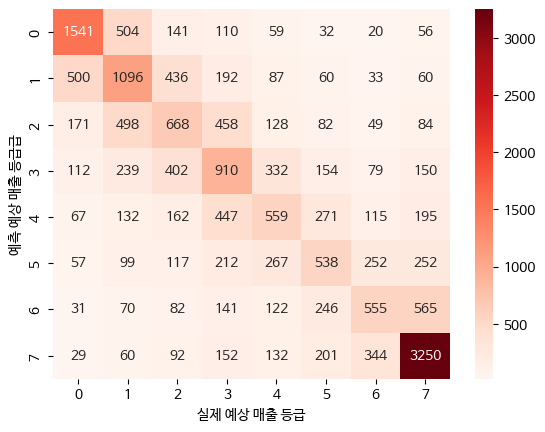

In [26]:
sns.heatmap(metrics.confusion_matrix(y_test, predicted_y), annot = True, fmt = 'd',cmap = 'Reds')
plt.xlabel('실제 예상 매출 등급')
plt.ylabel('예측 예상 매출 등급')
plt.show()

In [27]:
model.score(x_test,y_test)

0.4734382302539336

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

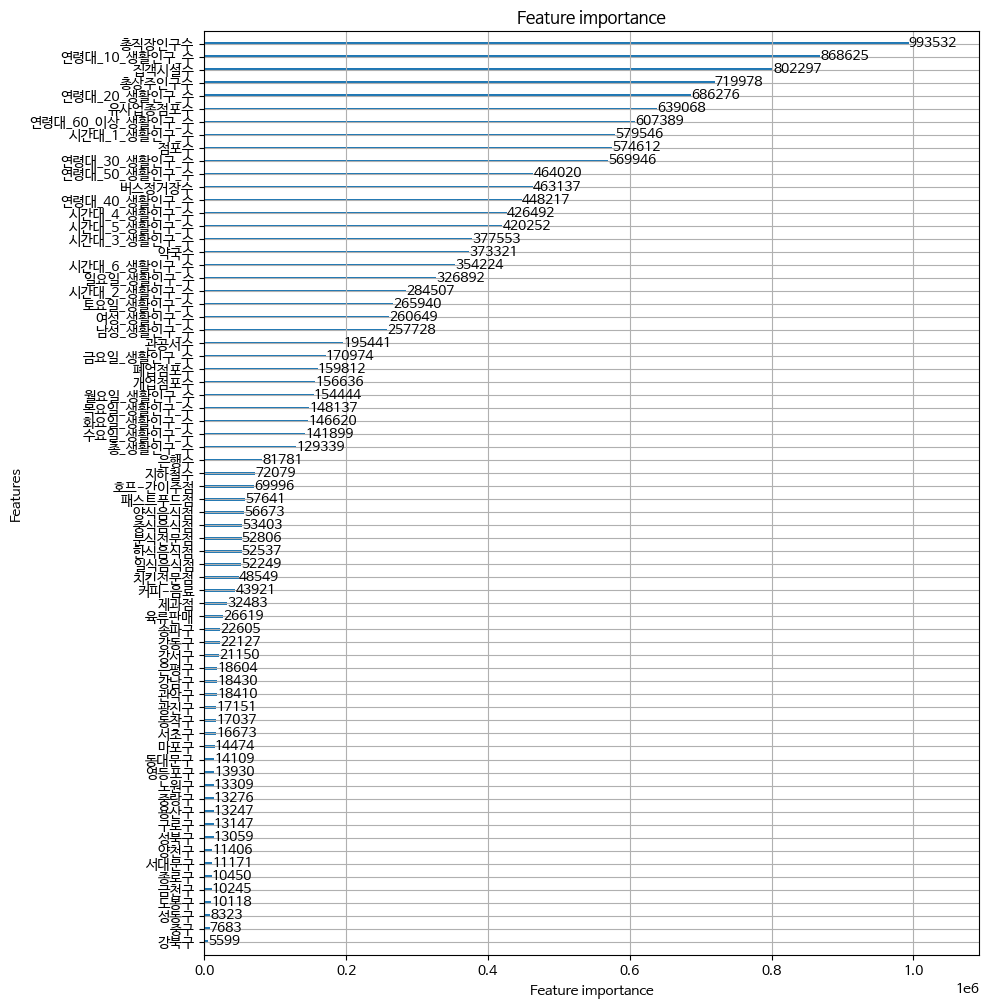

In [28]:
fig, ax = plt.subplots(figsize = (10,12))
lgb.plot_importance(model,ax=ax)

In [29]:
final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predicted_y)], axis = 1)

In [30]:
final_result

,분기당매출금액,0
0,5.0,5.0
1,4.0,6.0
2,1.0,5.0
3,3.0,2.0
4,0.0,0.0
...,...,...
19252,6.0,3.0
19253,0.0,2.0
19254,7.0,5.0
19255,1.0,1.0


In [39]:
import pickle
file = 'model_r.pkl'
pickle.dump(model, open(file, 'wb'))
print('Trained LGB model was saved!')

Trained LGB model was saved!


# 실제 테스트

In [32]:
test_pd = data.loc[data['강남구']==1]

In [33]:
inverse = ohe.inverse_transform(test_pd.iloc[:,35:71])

In [34]:
a = model.predict(test_pd.drop(columns='분기당매출금액'))

In [35]:
test_pd.drop(columns=test_pd.iloc[:,35:71].columns.tolist(),inplace=True)

In [36]:
test_pd['시군구명'] = inverse[:,0]
test_pd['서비스업종명'] = inverse[:,1]
test_pd['월예상매출'] = a

In [37]:
test_pd.columns

Index(['점포수', '유사업종점포수', '개업점포수', '폐업점포수', '집객시설수', '관공서수', '은행수', '버스정거장수',
       '지하철수', '약국수', '총직장인구수', '총상주인구수', '총_생활인구_수', '남성_생활인구_수', '여성_생활인구_수',
       '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수', '연령대_40_생활인구_수',
       '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '시간대_1_생활인구_수', '시간대_2_생활인구_수',
       '시간대_3_생활인구_수', '시간대_4_생활인구_수', '시간대_5_생활인구_수', '시간대_6_생활인구_수',
       '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수', '금요일_생활인구_수',
       '토요일_생활인구_수', '일요일_생활인구_수', '분기당매출금액', '시군구명', '서비스업종명', '월예상매출'],
      dtype='object')

In [38]:
test_pd.to_csv('강남구예상매출.csv', encoding='utf-8-sig')